In [1]:
!pip install pandas numpy seaborn matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = r"C:\Users\mutya\OneDrive\Desktop\datascince\train.csv"
titanic_data = pd.read_csv(df, on_bad_lines='skip')

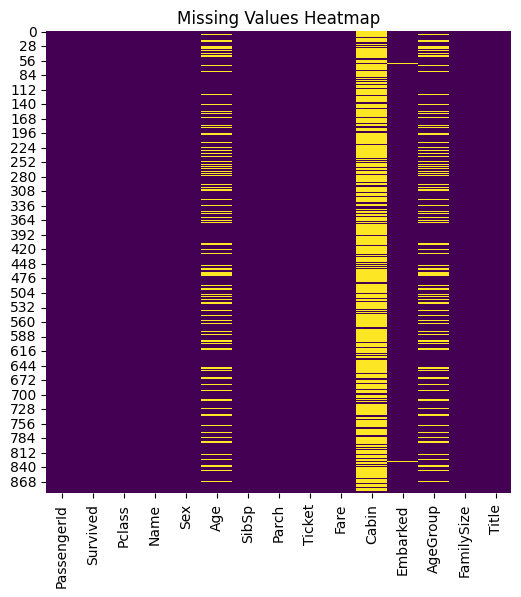

In [57]:
# Visualize missing data
plt.figure(figsize=(6, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [24]:
# Handle Missing Values
# Fill missing 'Age' with median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Fill missing 'Fare' with median (if applicable)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

# Drop remaining columns with excessive missing data
titanic_data.dropna(axis=1, inplace=True)

C:\Users\mutya\AppData\Local\Temp\ipykernel_27048\509679737.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
C:\Users\mutya\AppData\Local\Temp\ipykernel_27048\509679737.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [25]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
# Display basic info and summary statistics
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [27]:

print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


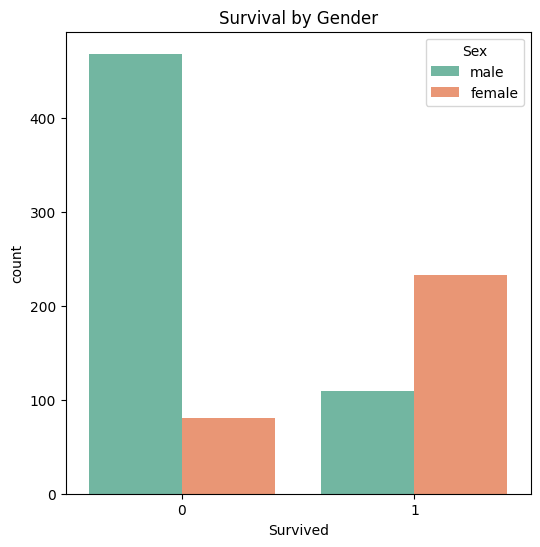

In [56]:
# Visualization 1: Survival by Gender
plt.figure(figsize=(6, 6))
sns.countplot(data=titanic_data, x="Survived", hue="Sex", palette="Set2")
plt.title("Survival by Gender")
plt.show()

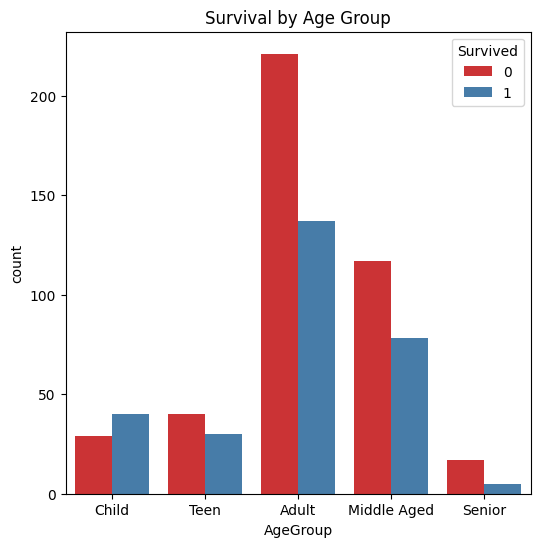

In [55]:
# Visualization 2: Survival by Age Group
plt.figure(figsize=(6, 6))
sns.countplot(data=titanic_data, x="AgeGroup", hue="Survived", palette="Set1")
plt.title("Survival by Age Group")
plt.show()

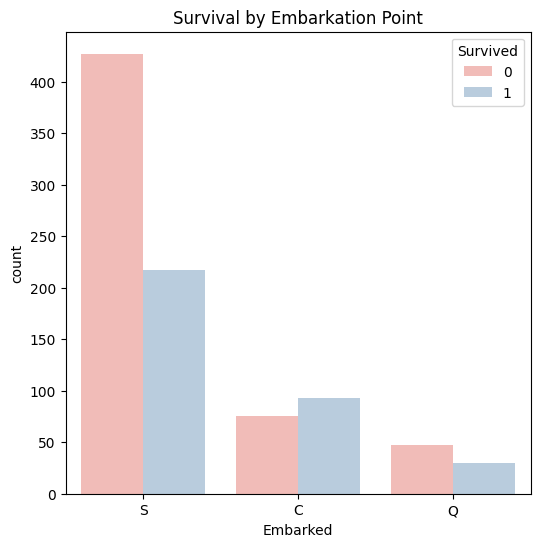

In [54]:
# Visualization 3: Survival by Embarkation Point
plt.figure(figsize=(6, 6))
sns.countplot(data=titanic_data, x="Embarked", hue="Survived", palette="Pastel1")
plt.title("Survival by Embarkation Point")
plt.show()

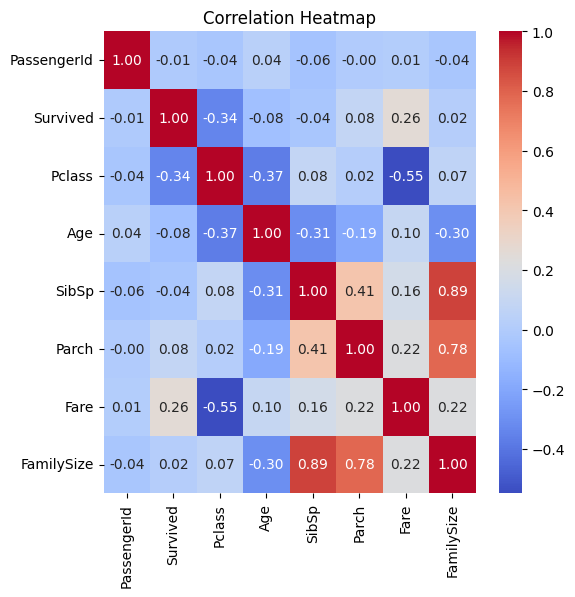

In [53]:
# Correlation Heatmap (Numerical Features)
numerical_data = titanic_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\mutya\AppData\Local\Temp\ipykernel_27048\2793206429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic_data, x="FamilySize", y="Survived", palette="Blues")


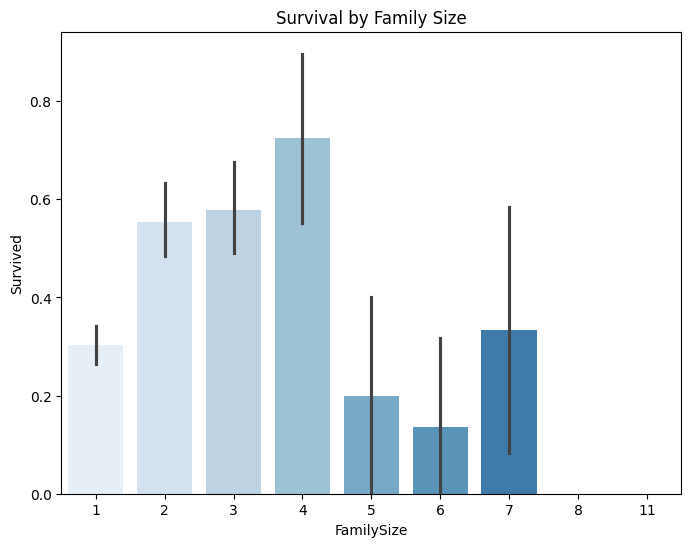

In [46]:
# Visualization 4: Survival by Family Size
plt.figure(figsize=(8, 6))
sns.barplot(data=titanic_data, x="FamilySize", y="Survived", palette="Blues")
plt.title("Survival by Family Size")
plt.show()

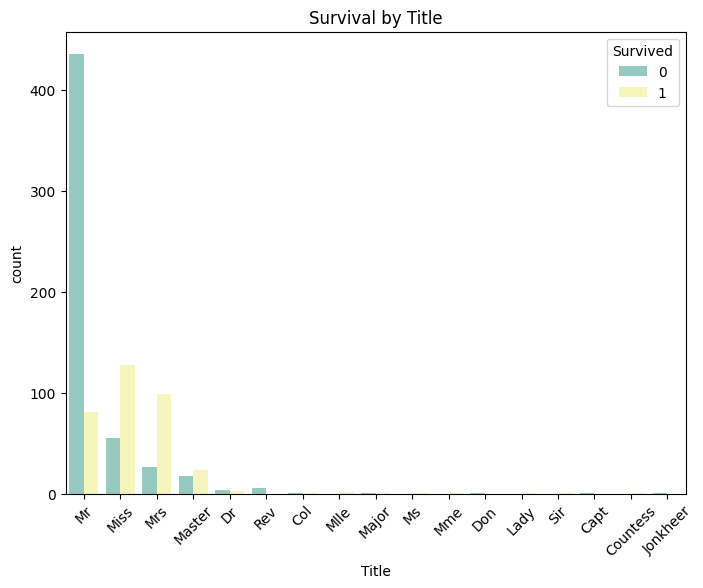

In [48]:
# Visualization 5: Survival by Title
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x="Title", hue="Survived", palette="Set3", order=titanic_data["Title"].value_counts().index)
plt.title("Survival by Title")
plt.xticks(rotation=45)
plt.show()

C:\Users\mutya\AppData\Local\Temp\ipykernel_27048\21835454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_data, x="Survived", y="Fare", palette="Pastel2")


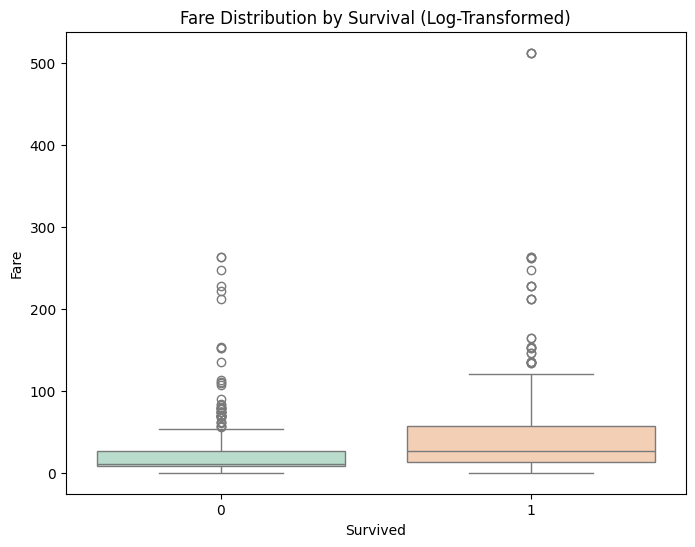

In [51]:
# Visualization 6: Fare Distribution by Survival (Log Transformed)
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic_data, x="Survived", y="Fare", palette="Pastel2")
plt.title("Fare Distribution by Survival (Log-Transformed)")
plt.show()